In [54]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [55]:
data = pd.read_csv("/home/enacom/Downloads/SPAM text message 20170820 - Data.csv")

## Data Analysis

In [56]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [57]:
data["Category"].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [58]:
from imblearn.under_sampling import RandomUnderSampler

X = data.drop(columns=["Category"])
y = data["Category"]


rus = RandomUnderSampler(random_state=42)


X_resampled, y_resampled = rus.fit_resample(X, y)


balanced_data = pd.DataFrame(X_resampled, columns=X.columns)
balanced_data["Category"] = y_resampled



In [59]:
balanced_data.head()

,Message,Category
3714,If i not meeting ü all rite then i'll go home ...,ham
1311,"I.ll always be there, even if its just in spir...",ham
548,"Sorry that took so long, omw now",ham
1324,I thk 50 shd be ok he said plus minus 10.. Did...,ham
3184,Dunno i juz askin cos i got a card got 20% off...,ham


## Preparing the Data

In [60]:
balanced_data['label']=balanced_data['Category'].map({'ham':0,'spam':1})

In [61]:
train_msg, test_msg, train_labels, test_labels =train_test_split(balanced_data['Message'],balanced_data['label'],test_size=0.2,random_state=42)

In [62]:
vocab_size=500
oov_tok='<OOV>'
max_len=50

In [63]:
token=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
token.fit_on_texts(train_msg)

In [64]:
padding_type='post'
truncate_type='post'
Trainning_seq=token.texts_to_sequences(train_msg)
Trainning_pad=pad_sequences(Trainning_seq,maxlen=50,padding=padding_type,truncating=truncate_type)

In [65]:
Testing_seq=token.texts_to_sequences(test_msg)
Testing_pad=pad_sequences(Testing_seq,maxlen=50,padding=padding_type,truncating=truncate_type)

## Training the Model

In [83]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, 16, input_shape=(50,)),  
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])



/home/enacom/miniconda3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:81: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [84]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_11 (Embedding)        │ (None, 50, 16)         │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_5      │ (None, 16)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,577 (33.50 KB)

 Trainable params: 8,577 (33.50 KB)

 Non-trainable params: 0 (0.00 B)

In [85]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'],optimizer='adam')

In [86]:
epoch=10
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history=model.fit(Trainning_pad, train_labels ,validation_data=(Testing_pad, test_labels),epochs=epoch,callbacks=[early_stop],verbose=2)

Epoch 1/10


/home/enacom/miniconda3/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:669: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


38/38 - 4s - 109ms/step - accuracy: 0.6059 - loss: 0.6753 - val_accuracy: 0.5418 - val_loss: 0.6624
Epoch 2/10
38/38 - 0s - 7ms/step - accuracy: 0.6561 - loss: 0.6219 - val_accuracy: 0.7559 - val_loss: 0.5969
Epoch 3/10
38/38 - 0s - 7ms/step - accuracy: 0.8033 - loss: 0.5466 - val_accuracy: 0.8227 - val_loss: 0.5141
Epoch 4/10
38/38 - 0s - 8ms/step - accuracy: 0.8343 - loss: 0.4683 - val_accuracy: 0.8428 - val_loss: 0.4405
Epoch 5/10
38/38 - 0s - 7ms/step - accuracy: 0.8561 - loss: 0.4041 - val_accuracy: 0.8662 - val_loss: 0.3774
Epoch 6/10
38/38 - 0s - 7ms/step - accuracy: 0.8745 - loss: 0.3460 - val_accuracy: 0.8763 - val_loss: 0.3329
Epoch 7/10
38/38 - 0s - 7ms/step - accuracy: 0.9096 - loss: 0.2905 - val_accuracy: 0.9030 - val_loss: 0.2830
Epoch 8/10
38/38 - 0s - 7ms/step - accuracy: 0.9205 - loss: 0.2494 - val_accuracy: 0.9197 - val_loss: 0.2513
Epoch 9/10
38/38 - 0s - 7ms/step - accuracy: 0.9297 - loss: 0.2121 - val_accuracy: 0.9264 - val_loss: 0.2239
Epoch 10/10
38/38 - 0s - 7ms

In [87]:
model.evaluate(Testing_pad, test_labels)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9381 - loss: 0.1808 


[0.2043226957321167, 0.9264214038848877]

Text(0.5, 0, 'epoch')

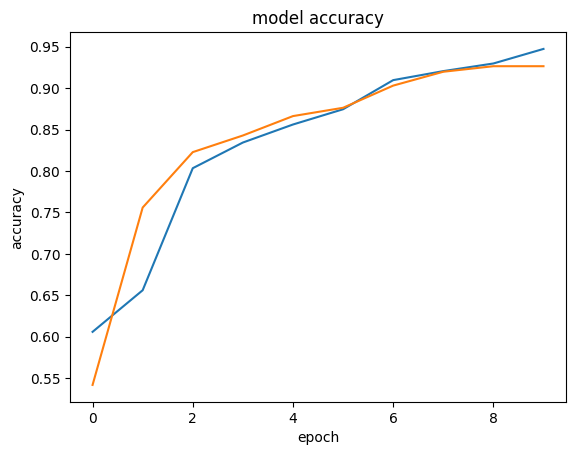

In [88]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')


## Predicting and Youden Threshold

In [78]:
y_pred_proba = model.predict(Testing_pad)

y_val = test_labels

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


In [80]:
from sklearn.metrics import roc_curve
def calculate_optimal_threshold(y_val, y_pred_proba):
    fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
    youden_index = tpr - fpr
    optimal_threshold = thresholds[np.argmax(youden_index)]
    return optimal_threshold

optimal_threshold = calculate_optimal_threshold(y_val, y_pred_proba)
optimal_threshold

0.53422046

In [81]:
predict_msg = ["Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",
          "Ok lar... Joking wif u oni...",
          "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]

In [82]:
def predict_spam(predict_msg):
    new_seq = token.texts_to_sequences(predict_msg)
    
    padded = pad_sequences(new_seq, maxlen=50, padding=padding_type, truncating='post')
    
    prediction = model.predict(padded)
    
    binary_prediction = (prediction >= 0.53422046).astype(int)
    
    return binary_prediction
predict_spam(predict_msg)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


array([[0],
       [0],
       [1]])